# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

In [1]:
import pandas as pd
import numpy as np

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [2]:
df = pd.read_csv('data/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Вывод:** пропусков в данных нет.

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [61]:
X = df.drop('sales', axis = 1)
y = df['sales']
X_array = X.to_numpy()
y = y.to_numpy()

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [62]:
X = np.hstack([np.ones(X_array.shape[0]).reshape(-1, 1), X_array])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [64]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))
X.shape

(200, 5)

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [57]:
i = 0
max_iter = 999
np.random.seed(42)
# зададим случайную точку
w_init  = np.random.uniform(-1000, 1000, (7, 1))
k = w_init.shape[0]
while i <= max_iter:
    r = y - X @ w_init
    for j in range(0, k):
        X_j = X[:, j].reshape(-1, 1)
        w_new_j = X_j * (r + X_j*w_init[j])
        r = r - X_j*w_new_j
        w_init[j] = w_new_j[0,0]
    i += 1
print(w_init)

#y_pred = X @ w_init
#mean_absolute_percentage_error(y, y_pred)
# 0.9605809645630995
w_init

[[1.4956337 ]
 [1.48811795]
 [1.48063997]
 [0.01264708]
 [2.0004318 ]
 [2.00950232]
 [2.7013206 ]]


array([[1.4956337 ],
       [1.48811795],
       [1.48063997],
       [0.01264708],
       [2.0004318 ],
       [2.00950232],
       [2.7013206 ]])

In [47]:
w_ideal = [ 42.5000792,   -0.95040482, 110.15857249,  73.47133693,  -0.65919361]
#w_ideal = [ 42.5000792,  0,  0,  0, 0]
r = np.sum((y - X @ w_ideal))**2/n
r
#1.52357947785182e-17


1.52357947785182e-17

In [44]:
#w_ideal = [ 198,  1,  1,  1, 1,  1,  1]
w_ideal = [ 198,  0,  0,  0,  0]
r = np.sum((y - X @ w_ideal))**2/n
r

0.0949236281677022

In [58]:
# создаём нулевой вектор весов
w = np.zeros(X.shape[1])
delta = 1
k = w.shape[0]
n = X.shape[0]
max_iter = 1000

#значение функции потерь в нулевой точке
r = np.sum((y - X @ w))**2/n
#r = y - X @ w_init
#while i <= max_iter:

#найдем направление убывания функции
orient = []
for j in range(0, k):
    w[j] = w[j] + 1000 #изменяем значение аргумета
    r_j = np.sum((y - X @ w))**2/n
    diff = (r_j - r)
    print(diff)
    if (diff <= 0):
        orient.append(1)
    else:
        orient.append(-1)

print(orient)
print(w)
    


603383.8064324661
2745555.5463574952
6376365.903807598
11361401.56031526
17529277.22329411
[-1, -1, -1, -1, -1]
[1000. 1000. 1000. 1000. 1000.]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [26]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)
print(model.intercept_)

[ 42.5000792   -0.95040482 110.15857249  73.47133693  -0.65919361]
0.0


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [76]:
print(np.array([5]) - 3.5)

[1.5]


In [85]:
A = np.array([
    [2.0, 5.3, 8.0], 
    [0.8, 2.0, 4.2]
])
mean_a = np.mean(A, axis=0)
std_a = np.std(A, axis=0)

for j in range(0, A.shape[1]):
    for i in range(0, A.shape[0]):
        A[i,j] = (A[i,j] - mean_a[j])/std_a[j]


A

array([[ 1.,  1.,  1.],
       [-1., -1., -1.]])

In [91]:
X = np.empty_like(X_array)

In [95]:
X = np.empty_like(X_array)
mean_a = np.mean(X_array, axis=0)
std_a = np.std(X_array, axis=0)

for j in range(0, X_array.shape[1]):
    for i in range(0, X_array.shape[0]):
        X[i,j] = (X_array[i,j] - mean_a[j])/std_a[j]

X.shape

(200, 4)

**Добавим единичный столбец**

In [96]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [97]:
def mse_error(y, y_pred):
    mse = np.sum((y-y_pred)**2)/y.shape[0]
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [99]:
mean_y = np.mean(y)
y_pred_test = np.full(( y.shape[0], 1), mean_y)

print(mse_error(y, y_pred_test))

5417.14875


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [100]:
def lin_pred(X, w):
    y_pred = X@w
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [101]:
def stoch_grad_step(X, y, w, train_id, eta):
    

array([[ 1.00000000e+00, -1.72341210e+00,  9.69852266e-01,
         9.81522472e-01,  1.77894547e+00],
       [ 1.00000000e+00, -1.70609137e+00, -1.19737623e+00,
         1.08280781e+00,  6.69578760e-01],
       [ 1.00000000e+00, -1.68877065e+00, -1.51615499e+00,
         1.52846331e+00,  1.78354865e+00],
       [ 1.00000000e+00, -1.67144992e+00,  5.20496822e-02,
         1.21785493e+00,  1.28640506e+00],
       [ 1.00000000e+00, -1.65412920e+00,  3.94182198e-01,
        -8.41613655e-01,  1.28180188e+00],
       [ 1.00000000e+00, -1.63680847e+00, -1.61540845e+00,
         1.73103399e+00,  2.04592999e+00],
       [ 1.00000000e+00, -1.61948775e+00, -1.04557682e+00,
         6.43904671e-01, -3.24708413e-01],
       [ 1.00000000e+00, -1.60216702e+00, -3.13436589e-01,
        -2.47406325e-01, -8.72486994e-01],
       [ 1.00000000e+00, -1.58484630e+00, -1.61657614e+00,
        -1.42906863e+00, -1.36042422e+00],
       [ 1.00000000e+00, -1.56752558e+00,  6.16042873e-01,
        -1.39530685e+00

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [ ]:
# ваш код

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [ ]:
# ваш код

**Выведите вектор весов, к которому сошелся метод.**

In [ ]:
# ваш код

**Выведите среднеквадратичную ошибку на последней итерации.**

In [ ]:
# ваш код

[ 3.11224951 10.06349446] 1787.6329056934615
Stochastic cost: 14382.466134439948
Stochastic cost: 14364.39019470491
Stochastic cost: 14346.891078823413
Stochastic cost: 14325.327858471173
Stochastic cost: 14261.237139373294
Stochastic cost: 14248.992613881786
Stochastic cost: 14191.493271122294
Stochastic cost: 14147.784815914167
Stochastic cost: 14124.840916176745
Stochastic cost: 14073.170155930778
Stochastic cost: 14061.750737683891
Stochastic cost: 14010.315232221086
Stochastic cost: 13975.904796339208
Stochastic cost: 13959.198450097378
Stochastic cost: 13930.191099869382
Stochastic cost: 13898.080193785774
Stochastic cost: 13859.569252572863
Stochastic cost: 13831.303201200555
Stochastic cost: 13810.711494069119
Stochastic cost: 13786.382122440153
Stochastic cost: 13770.60581460107
Stochastic cost: 13735.1523527312
Stochastic cost: 13724.766417724837
Stochastic cost: 13686.892648930847
Stochastic cost: 13661.278010189491
Stochastic cost: 13650.999217759405
Stochastic cost: 13628.

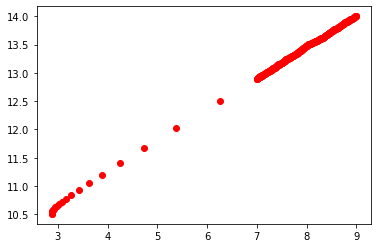

In [103]:
import numpy as np
import matplotlib.pyplot as plt

TOTAL = 200
STEP = 0.25
EPS = 0.1
INITIAL_THETA = [9, 14]


def func(x):
    return 0.2 * x + 3


def generate_sample(total=TOTAL):
    x = 0
    while x < total * STEP:
        yield func(x) + np.random.uniform(-1, 1) * np.random.uniform(2, 8)
        x += STEP


def cost_function(A, Y, theta):
    return (Y - A@theta).T@(Y - A@theta)


def batch_descent(A, Y, speed=0.001):
    theta = np.array(INITIAL_THETA.copy(), dtype=np.float32)
    theta.reshape((len(theta), 1))
    previous_cost = 10 ** 6
    current_cost = cost_function(A, Y, theta)
    while np.abs(previous_cost - current_cost) > EPS:
        previous_cost = current_cost
        derivatives = [0] * len(theta)
        # ---------------------------------------------
        for j in range(len(theta)):
            summ = 0
            for i in range(len(Y)):
                summ += (Y[i] - A[i]@theta) * A[i][j]
            derivatives[j] = summ
        # Выполнение требования одновремменности
        theta[0] += speed * derivatives[0]
        theta[1] += speed * derivatives[1]
        # ---------------------------------------------
        current_cost = cost_function(A, Y, theta)
        print("Batch cost:", current_cost)
        plt.plot(theta[0], theta[1], 'ro')
    return theta


def stochastic_descent(A, Y, speed=0.1):
    theta = np.array(INITIAL_THETA.copy(), dtype=np.float32)
    previous_cost = 10 ** 6
    current_cost = cost_function(A, Y, theta)
    while np.abs(previous_cost - current_cost) > EPS:
        previous_cost = current_cost
        # --------------------------------------
        # for i in range(len(Y)):
        i = np.random.randint(0, len(Y))
        derivatives = [0] * len(theta)
        for j in range(len(theta)):
            derivatives[j] = (Y[i] - A[i]@theta) * A[i][j]
        theta[0] += speed * derivatives[0]
        theta[1] += speed * derivatives[1]
        # --------------------------------------
        current_cost = cost_function(A, Y, theta)
        print("Stochastic cost:", current_cost)
        plt.plot(theta[0], theta[1], 'ro')
    return theta

X = np.arange(0, TOTAL * STEP, STEP)
Y = np.array([y for y in generate_sample(TOTAL)])

# Нормализацию вкрячил, чтобы парабалоид красивый был
X = (X - X.min()) / (X.max() - X.min())

A = np.empty((TOTAL, 2))
A[:, 0] = 1
A[:, 1] = X

theta = np.linalg.pinv(A).dot(Y)
print(theta, cost_function(A, Y, theta))

#import time
#start = time.clock()
theta_stochastic = stochastic_descent(A, Y, 0.001)
print("St:", theta_stochastic)

#theta_batch = batch_descent(A, Y, 0.001)
#print("Btch:", theta_batch)

In [107]:
X

array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
       0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
       0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
       0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
       0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
       0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
       0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
       0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
       0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
       0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
       0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
       0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
       0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
       0.32663317, 0.33165829, 0.33668342, 0.34170854, 0.34673367,
       0.35175879, 0.35678392, 0.36180905, 0.36683417, 0.37185